# Quick Plot of Water Body Timeseries

In [1]:
%pylab notebook

import xarray as xr
import pandas as pd
import numpy as np
import os

Populating the interactive namespace from numpy and matplotlib


## Where are the timeseries saved?

In [2]:
TimeseriesFolder = '/g/data/r78/cek156/dea-notebooks/WaterbodyAreaMappingandMonitoring/timeseries_aus/'

## Which water body data would you like to plot up?

In [3]:
WaterID = 141701

## Plot it!

<IPython.core.display.Javascript object>


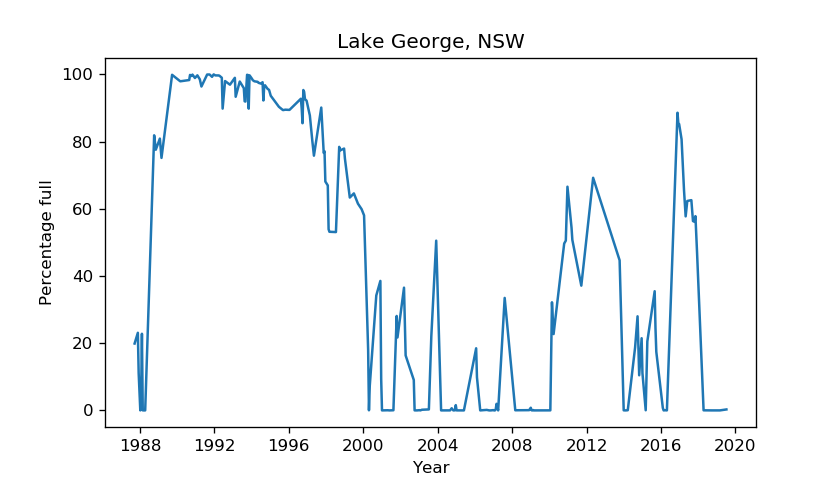

/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Lake George, NSW')

In [4]:
WaterBodyOfInterest = str(WaterID)
WaterBodyOfInterest = WaterBodyOfInterest.zfill(6)

TimeHistory = pd.read_csv(f'{TimeseriesFolder}{WaterBodyOfInterest[:4]}/{WaterBodyOfInterest}.csv')

TimeHistory['Observation Date'] = pd.to_datetime(TimeHistory['Observation Date'])

plt.figure(figsize = [7,4])
plt.plot(TimeHistory['Observation Date'], TimeHistory['Wet pixel percentage'])
plt.xlabel('Year')
plt.ylabel('Percentage full')
plt.title('Lake George, NSW')#FID: {}'.format(WaterBodyOfInterest))
#plt.xlim(['01-01-2018', '01-01-2020'])

## Automatically interrogate results

In [6]:
AllFiles = os.listdir(TimeseriesFolder)

In [7]:
HowOftenNotZero = []
for files in AllFiles:
    PolyName = files.split('.')[0]
    FileContents = pd.read_csv(f'{TimeseriesFolder}{files}')
    NotZero = np.count_nonzero(FileContents['Wet pixel percentage'])/FileContents.shape[0] * 100
    HowOftenNotZero.append([PolyName, NotZero])
HowOftenNotZero = pd.DataFrame(HowOftenNotZero, columns=['OBJECTID', 'PercentageNonZero'])

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
HowOftenNotZero.sort_values(by='PercentageNonZero', ascending=False, inplace=True)

In [ ]:
HowOftenNotZero